## Unsupervised Learning
#### by **Ivan Alducin**
<p><img src="https://cdn.gritglobal.io/uploads/too-broad-customer-segmentation.jpg" width="1000"/></p>

## Segmentacion de Clientes
<p>En esté capitulo nos vamos a enfocar en entender y trabajar un caso de uso para segmentación de clientes, pero antes de eso aquí una pequeña lista de más aplicaciones que se pueden trabajar con los datos recopliados de mis clientes

- Estadística Descriptiva
- Segmentación de Clientes
- Predicción de Abandono
- Valor del Cliente a traves del tiempo (CTLV)

La segmentación la vamos a hacer con base en una metodolgía llamada <b>RFM</b>

</p>

In [1]:
# Importa Pandas, Numpy, Seaborn y Matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Importa el archivo "Online Retail.csv"
df = pd.read_csv("M30 Online Retail.csv", encoding = "ISO-8859-1")

## Análisis Exploratorio

In [2]:
# Busqueda de valores nulos con la funcion info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
# eliminar valores nulos
df = df.dropna()
# Busqueda de valores nulos con la funcion info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    406829 non-null  object 
 1   STOCK_CODE    406829 non-null  object 
 2   DESCRIPTION   406829 non-null  object 
 3   QUANTITY      406829 non-null  int64  
 4   INVOICE_DATE  406829 non-null  object 
 5   UNIT_PRICE    406829 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [4]:
# visualizar los primeros 20 registros del dataframe
df.head(20)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2019 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2019 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/2019 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/2019 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01/12/2019 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01/12/2019 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01/12/2019 08:34,1.69,13047.0,United Kingdom


## Recency
<p>Indicador que nos dice que tan reciente es la compra de un cliente</p>

In [5]:
# Obtener los clientes unicos
customer = df['CUSTOMER_ID'].unique()
# Convertir customer a un DataFrame
customer_df = pd.DataFrame(customer, columns=['CUSTOMER_ID'])
customer_df.describe()

,CUSTOMER_ID
count,4372.000000
mean,15299.677722
std,1722.390705
min,12346.000000
25%,13812.750000
50%,15300.500000
75%,16778.250000
max,18287.000000


In [6]:
# Obtener la última fecha de compra por cliente
# Convertir la columna INVOICE_DATE a formato datetime con el formato correcto y dayfirst=True
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], format="%d/%m/%Y %H:%M", dayfirst=True)
max_purchase = df.groupby('CUSTOMER_ID').INVOICE_DATE.max().reset_index()

In [7]:
# Vamos a calcular nuestra metrica de Recency, esto lo haremos restando los días de la última fecha de compra a cada observacón
reference_date = df['INVOICE_DATE'].max()  
max_purchase['RECENCY'] = (reference_date - max_purchase['INVOICE_DATE']).dt.days

In [8]:
# Unir el DataFrame de clientes únicos con el que acabamos de crear de la última fecha de compra
customer1 = pd.merge(customer_df, max_purchase[['CUSTOMER_ID', 'RECENCY']], on='CUSTOMER_ID')

(array([424., 202., 302.,  84., 236., 180., 151., 116., 138., 100.,  91.,
         88.,  55., 132.,  62.,  77.,  88.,  70.,  69.,  69.,  59.,  45.,
         49.,  31.,  33.,  33.,  25.,  13.,  50.,  23.,  24.,  27.,  24.,
         24.,  20.,  25.,  22.,  23.,  15.,  23.,  25.,  36.,  10.,  22.,
         19.,  34.,  15.,  25.,  16.,  26.,  27.,  15.,  25.,  13.,  23.,
          9.,  32.,  11.,  31.,   8.,  14.,   6.,  30.,  23.,  17.,  20.,
         13.,  25.,  12.,  23.,  21.,  29.,  12.,  19.,  16.,  20.,   4.,
         21.,   8.,  14.,  15.,  15.,  13.,  25.,   9.,  19.,  15.,   9.,
         12.,  13.,   8.,   0.,   0.,   1.,  12.,  16.,  16.,  27.,  16.,
         40.]),
 array([  0.  ,   3.74,   7.48,  11.22,  14.96,  18.7 ,  22.44,  26.18,
         29.92,  33.66,  37.4 ,  41.14,  44.88,  48.62,  52.36,  56.1 ,
         59.84,  63.58,  67.32,  71.06,  74.8 ,  78.54,  82.28,  86.02,
         89.76,  93.5 ,  97.24, 100.98, 104.72, 108.46, 112.2 , 115.94,
        119.68, 123.42, 127.16

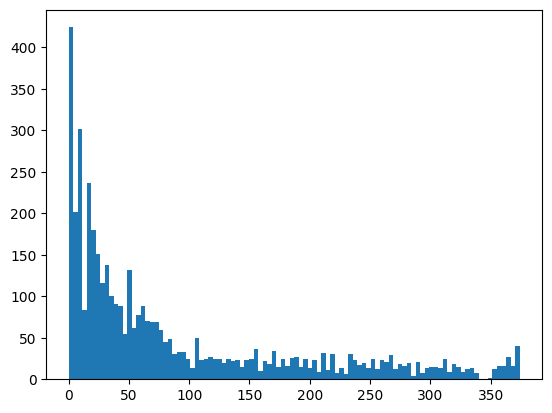

In [9]:
# Grafica un histograma de Recency
plt.hist(customer1['RECENCY'], bins=100)

In [10]:
# Imprime la Estadística de Resumen para Recency
print(customer1['RECENCY'].describe())

count    4372.000000
mean       91.123056
std       100.946554
min         0.000000
25%        16.000000
50%        49.000000
75%       142.000000
max       374.000000
Name: RECENCY, dtype: float64


## Frequency
<p>Frecuencia con la que un cliente compra uno o más productos</p>

In [11]:
# Obtener el número de compras por cliente
frequency = df.groupby('CUSTOMER_ID').INVOICE_DATE.count().reset_index()
frequency.columns = ['CUSTOMER_ID', 'FREQUENCY']
frequency

,CUSTOMER_ID,FREQUENCY
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [12]:
# Unir el DataFrame que acabamos de crear con el de los clientes unicos
customer = pd.merge(customer1, frequency, on='CUSTOMER_ID')
customer.describe()

,CUSTOMER_ID,RECENCY,FREQUENCY
count,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.123056,93.053294
std,1722.390705,100.946554,232.471608
min,12346.000000,0.000000,1.000000
25%,13812.750000,16.000000,17.000000
50%,15300.500000,49.000000,42.000000
75%,16778.250000,142.000000,102.000000
max,18287.000000,374.000000,7983.000000


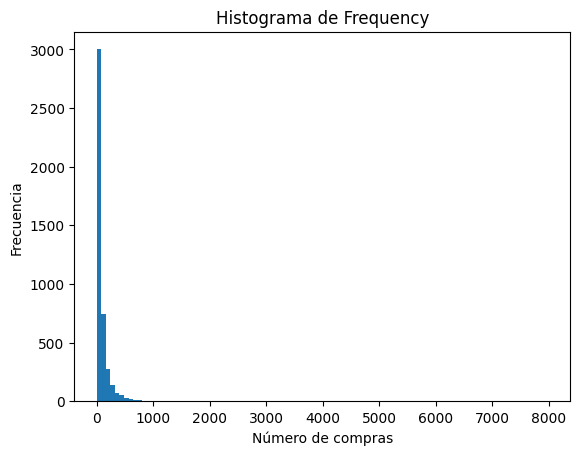

In [13]:
# Graficar histograma de Frequency
frequency_df = customer['FREQUENCY']
plt.hist(frequency_df, bins=100)
plt.xlabel('Número de compras')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frequency')
plt.show()

In [14]:
# Imprime la Estadística de Resumen para Frequency
frequency_df.describe()

count    4372.000000
mean       93.053294
std       232.471608
min         1.000000
25%        17.000000
50%        42.000000
75%       102.000000
max      7983.000000
Name: FREQUENCY, dtype: float64

## Monetary
<p>Valor del monto total que ha gastado un cliente en la compra de mis productos</p>

In [15]:
# Calcular el monto total por cada compra
df['MONETARY'] = df['UNIT_PRICE'] * df['QUANTITY']

# Obtener el valor monetario de compra por cliente
monetary = df.groupby('CUSTOMER_ID').MONETARY.sum().reset_index()

In [16]:
# Unir el DataFrame que acabamos de crear con el de los clientes unicos
customer = pd.merge(customer, monetary, on='CUSTOMER_ID')

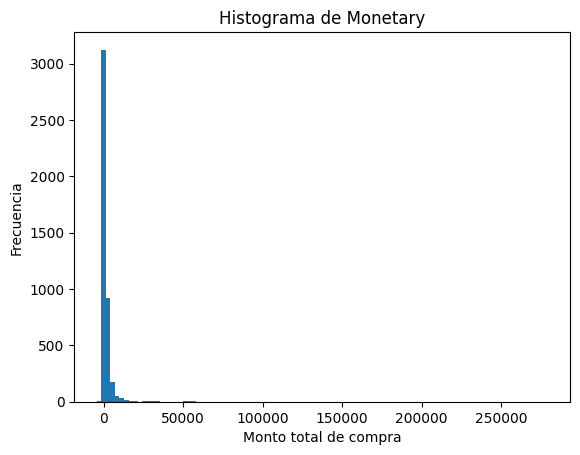

In [17]:
# Grafica un histograma de Monetary
monetary_df = customer['MONETARY']
plt.hist(monetary_df, bins=100)
plt.xlabel('Monto total de compra')
plt.ylabel('Frecuencia')
plt.title('Histograma de Monetary')
plt.show()

In [18]:
# Imprime la Estadística de Resumen para Monetary
monetary_df.describe()

count      4372.000000
mean       1898.459701
std        8219.345141
min       -4287.630000
25%         293.362500
50%         648.075000
75%        1611.725000
max      279489.020000
Name: MONETARY, dtype: float64

## Algoritmo k-Means
<p>Ya creamos nuestros indicadores principales de la metodología RFM. es hora de hacer <i>Machine Learning</i>. Para ello utilizaremos un algoritmo no supervisado llamado <b>k-Means</b></p>
<p><img src="https://miro.medium.com/max/818/1*fG8u8nV7qR91wDyFDEEV-g.png" width="250"/></p>

In [19]:
# Funcion para ordenar los clusters
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

## Elbow Method
<p>¿Cual es mi número óptimo de clusters? Vamos a contruir una <i>gráfica de codo</i> para averiguarlo</p>

In [20]:
# Importa la librería de kMeans
import sklearn
from sklearn.cluster import KMeans

C:\Users\benma\AppData\Local\Temp\ipykernel_18388\723009742.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recency["clusters"] = kmeans.labels_
C:\Users\benma\AppData\Local\Temp\ipykernel_18388\723009742.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recency["clusters"] = kmeans.labels_
C:\Users\benma\AppData\Local\Temp\ipykernel_18388\723009742.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

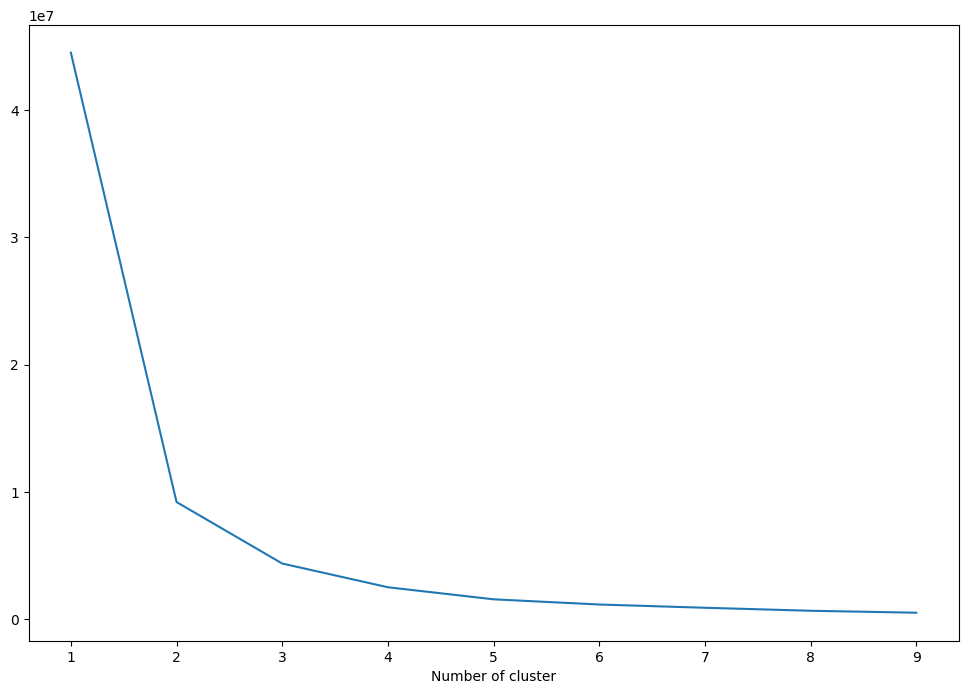

In [22]:
# Configuración inicial - Vamos a tomar como referencia el indicador de Recency
sse={}
recency = customer[['CUSTOMER_ID', 'RECENCY']]

for k in range(1, 10):
    # Instancia el algoritmo de k-means iterando sobre k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Entrena el algoritmo
    kmeans.fit(recency[['RECENCY']])

    # Adjunta las etiquetas
    recency["clusters"] = kmeans.labels_

    # Adunta la inercia o variación al arreglo sse
    sse[k] = kmeans.inertia_
    
# Grafico de codo (Elbow)
plt.figure(figsize=(12,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [23]:
# Instanciar el algoritmo con 4 clusters para Recency 
kmeans = KMeans(n_clusters=4, random_state=1)

# Entrenar el algoritmo
kmeans.fit(recency[['RECENCY']])

# Obtener las predicciones
customer['RECENCY_CLUSTER'] = kmeans.labels_

# Ordenar los clusters
customer = order_cluster('RECENCY_CLUSTER', 'RECENCY', customer, False)

# Estadística Descriptiva del cluster creado
customer.groupby('RECENCY_CLUSTER')['RECENCY'].describe()

,count,mean,std,min,25%,50%,75%,max
RECENCY_CLUSTER,,,,,,,,
0,528.0,306.907197,40.650555,246.0,269.0,303.0,338.0,374.0
1,628.0,185.367834,32.666602,132.0,156.0,184.0,213.0,245.0
2,1059.0,77.814920,22.830097,48.0,59.0,73.0,93.5,131.0
3,2157.0,17.397311,13.188805,0.0,6.0,16.0,28.0,47.0


In [24]:
# Instanciar el algoritmo con 4 clusters para Frequency 
kmeans = KMeans(n_clusters=4, random_state=1)

# Entrenar el algoritmo
kmeans.fit(customer[['FREQUENCY']])

# Obtener las predicciones
customer['FREQUENCY_CLUSTER'] = kmeans.labels_

# Ordenar los clusters
customer = order_cluster('FREQUENCY_CLUSTER', 'FREQUENCY', customer, True)

# Estadística Descriptiva de los clusters
customer.groupby('FREQUENCY_CLUSTER')['FREQUENCY'].describe()

,count,mean,std,min,25%,50%,75%,max
FREQUENCY_CLUSTER,,,,,,,,
0,4052.0,57.741362,56.828243,1.0,16.0,36.0,83.25,260.0
1,315.0,464.834921,283.666393,261.0,306.0,372.0,501.50,2491.0
2,4.0,4613.750000,1326.992182,2782.0,4177.0,4885.0,5321.75,5903.0
3,1.0,7983.000000,NaN,7983.0,7983.0,7983.0,7983.00,7983.0


In [25]:
# Instanciar el algoritmo con 4 clusters para Monetary 
kmeans = KMeans(n_clusters=4, random_state=1)

# Entrenar el algoritmo
kmeans.fit(customer[['MONETARY']])

# Obtener las predicciones
customer['MONETARY_CLUSTER'] = kmeans.labels_

# Ordenar los clusters ¿Como tienes que ordenar el cluster?
customer = order_cluster('MONETARY_CLUSTER', 'MONETARY', customer, True)

customer = customer.sort_values(by='MONETARY', ascending=False)

# Estadística Descriptiva de los clusters
customer.groupby('MONETARY_CLUSTER')['MONETARY'].describe()

,count,mean,std,min,25%,50%,75%,max
MONETARY_CLUSTER,,,,,,,,
0,4068.0,944.085770,961.271060,-4287.63,271.3600,594.000,1305.315,4464.10
1,270.0,8049.000630,3759.165617,4478.53,5354.9825,6698.805,9516.325,21535.90
2,28.0,42614.387143,15826.362501,25748.35,28968.7950,35078.555,53120.315,88125.38
3,6.0,182181.981667,71585.164123,113384.14,125937.2425,160027.395,239199.410,279489.02


## Score de Segmentación
<p>El algoritmo de k-means nos da una segmentación generalizada, pero podemos personalizarla aún más creando una métrica que asigne una calificación al valor del cluster. Esto es lo que vamos a hacer!!</p>

In [26]:
# Vamos a crear nuestro score sumando el valor de cada uno de los clusters
customer['SCORE'] = customer['RECENCY_CLUSTER'] + customer['FREQUENCY_CLUSTER'] + customer['MONETARY_CLUSTER']

# Obtener el promedio para cada una de las métricas de las calificaciones creadas (Score)
customer['SCORE'].mean()

np.float64(2.2614364135407135)

In [27]:
# Crea una funcion que asigne lo siguiente: 
# Si score <= 1 entonces 'Low-Value', si score >1 y <=4 entonces 'Average', si score >4 y <=6 entonces 'Potential', por último si score >6 entonces 'High-Value'
def segment(score):
    if score <= 1:
        return 'Low-Value'
    elif score > 1 and score <= 4:
        return 'Average'
    elif score > 4 and score <= 6:
        return 'Potential'
    else:
        return 'High-Value'

# Crear una columna aplicando esta función al campo 'SCORE'
customer['SEGMENT'] = customer['SCORE'].apply(segment)

In [28]:
# Vamos a dar un vistazo a la tabla final
customer.head()

,CUSTOMER_ID,RECENCY,FREQUENCY,MONETARY,RECENCY_CLUSTER,FREQUENCY_CLUSTER,MONETARY_CLUSTER,SCORE,SEGMENT
908,14646.0,1,2085,279489.02,3,1,3,7,High-Value
450,18102.0,0,433,256438.49,3,1,3,7,High-Value
402,17450.0,7,351,187482.17,3,1,3,7,High-Value
67,14911.0,0,5903,132572.62,3,2,3,8,High-Value
979,12415.0,23,778,123725.45,3,1,3,7,High-Value


In [29]:
# Imprime la proporción o el total de clientes por segmento
customer['SEGMENT'].value_counts()

SEGMENT
Average       3042
Low-Value     1148
Potential      173
High-Value       9
Name: count, dtype: int64

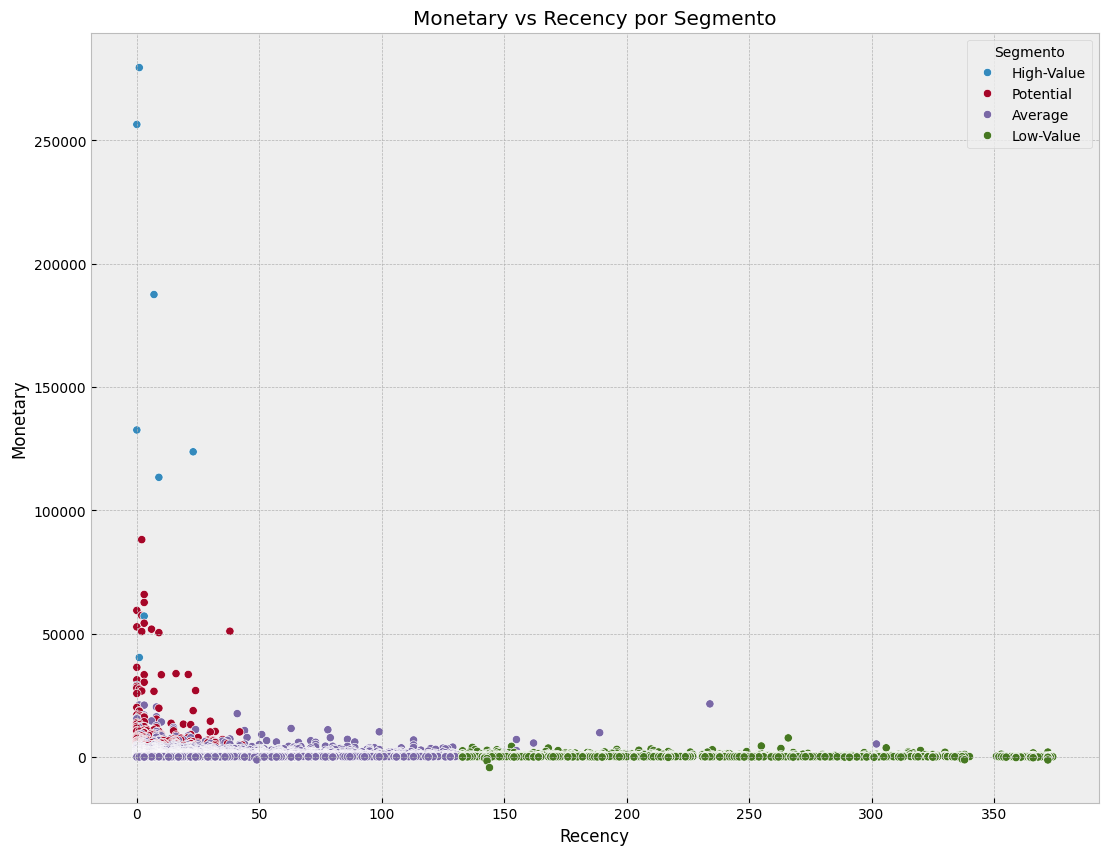

In [36]:
# Define un estilo 'bmh'
plt.style.use('bmh')

# Filtra los valores para RECENCY < 4000
filtered = customer[customer['RECENCY'] < 4000]

# Crea un grafico de dispersion de 'MONETARY' VS 'RECENCY' por Segmento
plt.figure(figsize=(13,10))
sns.scatterplot(data=filtered, x='RECENCY', y='MONETARY', hue='SEGMENT')
plt.title('Monetary vs Recency por Segmento')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(title='Segmento')
plt.show()


En esta grafica comprobamos que hay clientes que no pasa mucho tiempo para que realizan una compra con alto valor, y nos deberiamos enfocar en ellos y los clientes de color verde son clientes inactivos o que realizan gastos muy esporadicos y con un valor bajo

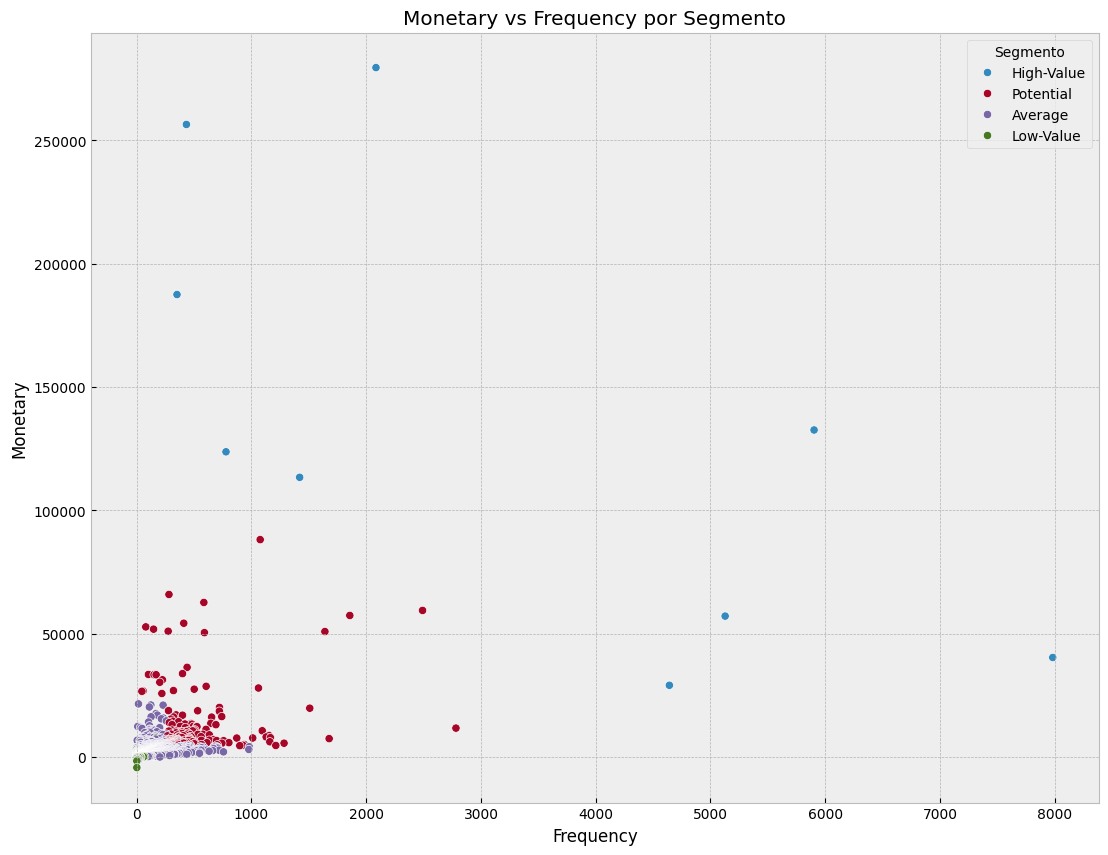

In [37]:
# Crea un grafico de dispersion de 'MONETARY' vs 'FREQUENCY' por Segmento
plt.figure(figsize=(13,10))
sns.scatterplot(data=customer, x='FREQUENCY', y='MONETARY', hue='SEGMENT')
plt.title('Monetary vs Frequency por Segmento')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='Segmento')
plt.show()

# Conclusiones del Análisis RFM

Mediante la implementación de la metodología RFM (Recency, Frequency, Monetary) y el algoritmo de k-Means, se logró segmentar exitosamente la base de clientes en cuatro categorías principales:

- **High-Value**: Clientes de alto valor con compras recientes y frecuentes
- **Potential**: Clientes con potencial de crecimiento 
- **Average**: Clientes promedio con comportamiento estándar
- **Low-Value**: Clientes inactivos o de bajo valor

1. La segmentación nos permitio identificar claramente a los clientes más valiosos y aquellos que requieren estrategias de retención.

2. Los gráficos de dispersión revelan que existe una correlación entre la frecuencia de compra, el valor monetario gastado y la recencia de las transacciones.

3. El Método del Codo (Elbow Method) permitió determinar de manera objetiva que 4 clusters es la cantidad óptima para la segmentación.

De lo cual podriamos sugerir:
- La empresa debe concentrar sus recursos en mantener y potenciar a los clientes High-Value
- Los clientes Potential representan una oportunidad para aumentar su valor mediante campañas targeted
- Los clientes Low-Value requieren estrategias específicas de reactivación para evitar el abandono definitivo